In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

path = './input/'

data = pd.read_csv(path + 'train.csv')
data.shape

(891, 12)

In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Gender vs Surivival 

In order to know if the gender of a person played an important role in the improving their survival rate, we plot the Survival vs Gender. 

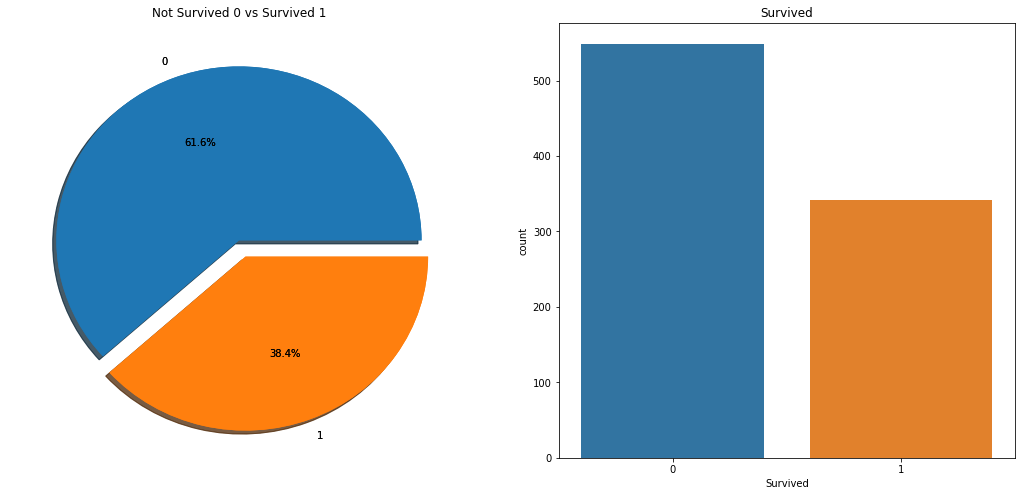

In [113]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
labels = ['Not Survived', 'Survived']
sizes = list(data['Survived'].value_counts())
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Not Survived 0 vs Survived 1')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In totality, we can see that the persons' gender does play a crucial role. We have to dig further to know the survival rate distribution.

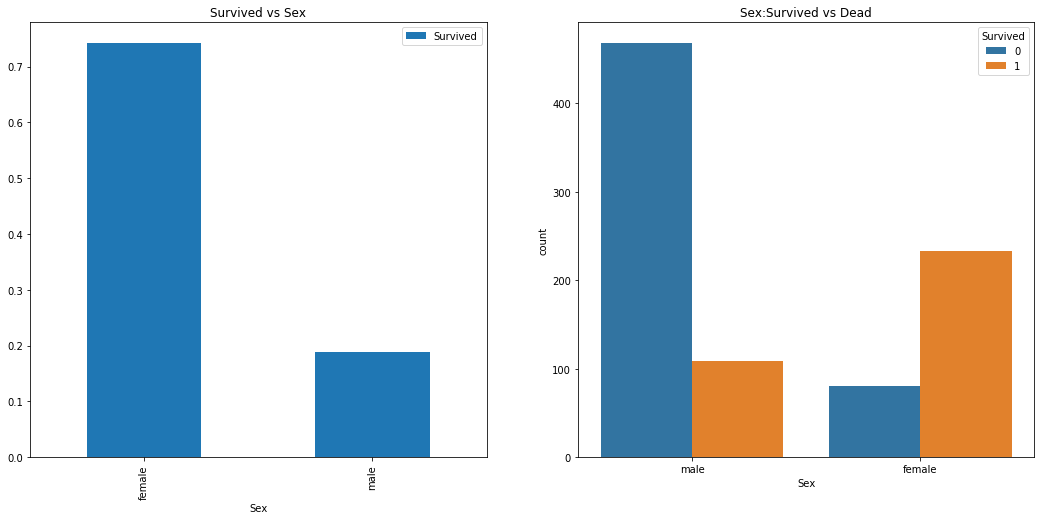

In [98]:
f,ax=plt.subplots(1,2,figsize=(18,8))
barlist=data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Despite the fact that men outnumber women, we can still see that for women, their survival rate is more that 70%.

# Age Group vs Survival

We need to see the distribution of Survival Rate within each age group. 

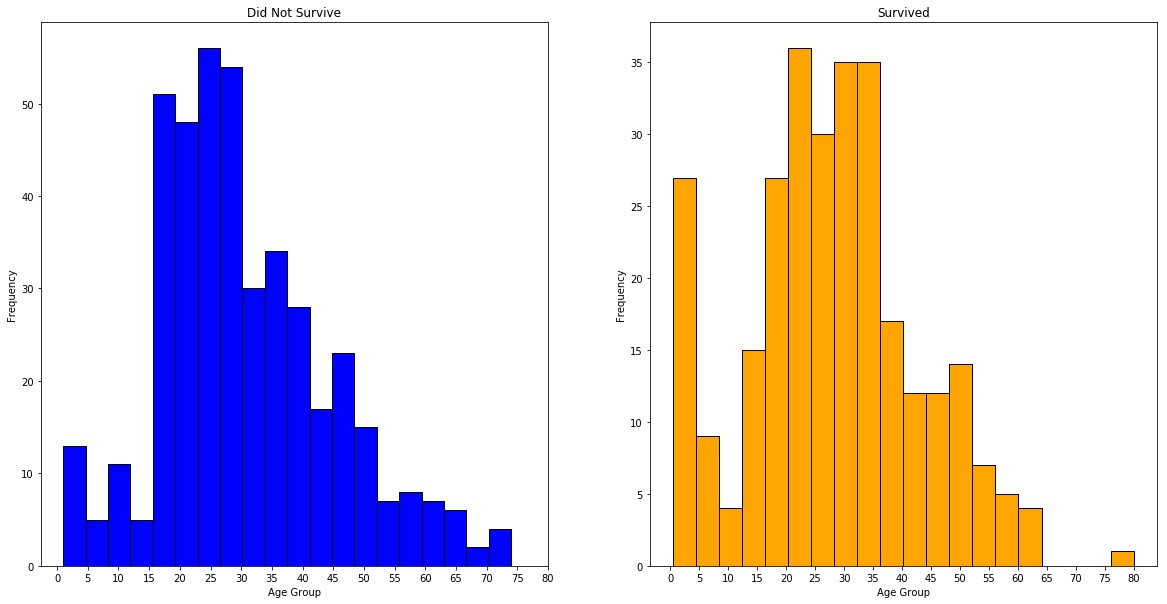

In [126]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='blue')
ax[0].set_title('Did Not Survive')
ax[0].set_xlabel('Age Group')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='orange',bins=20,edgecolor='black')
ax[1].set_title('Survived')
ax[1].set_xlabel('Age Group')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

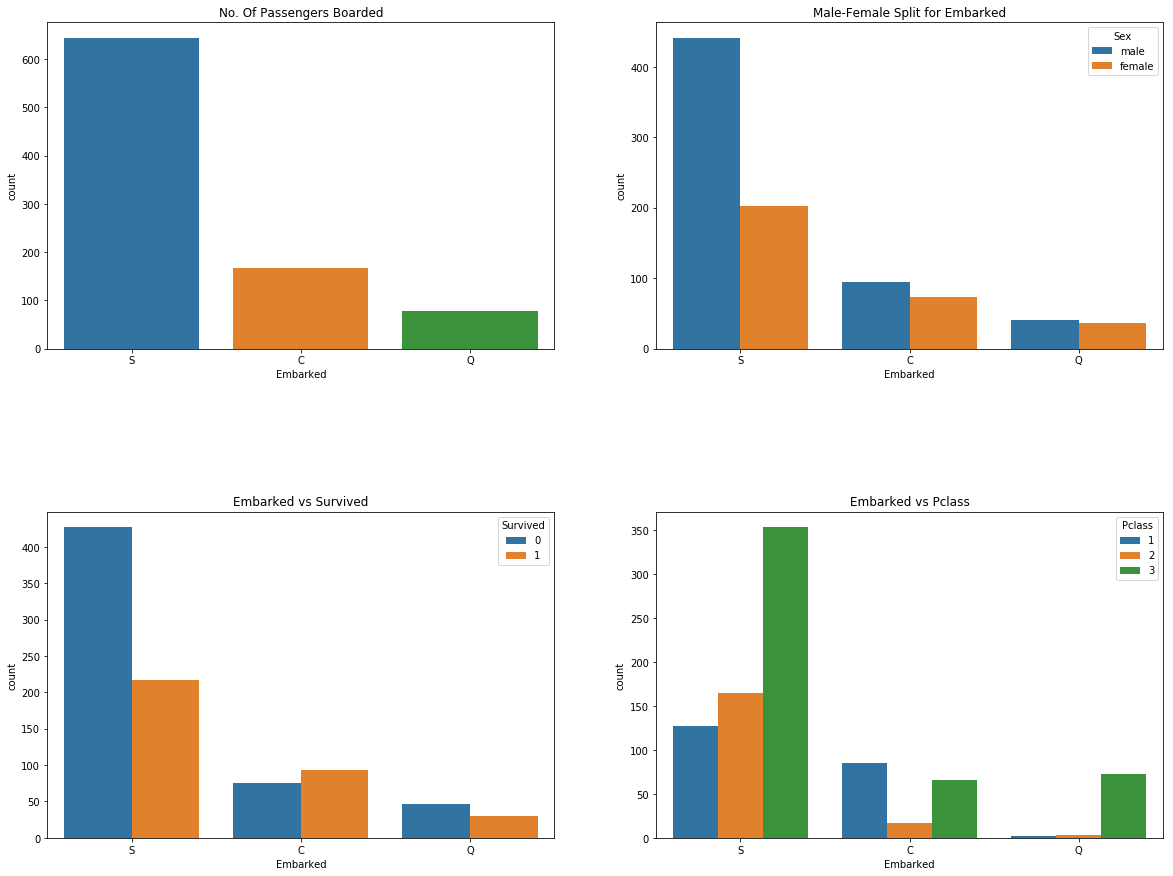

In [104]:
    f,ax=plt.subplots(2,2,figsize=(20,15))
    sns.countplot('Embarked',data=data,ax=ax[0,0])
    ax[0,0].set_title('No. Of Passengers Boarded')
    sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
    ax[0,1].set_title('Male-Female Split for Embarked')
    sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
    ax[1,0].set_title('Embarked vs Survived')
    sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
    ax[1,1].set_title('Embarked vs Pclass')
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.show()

In [107]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

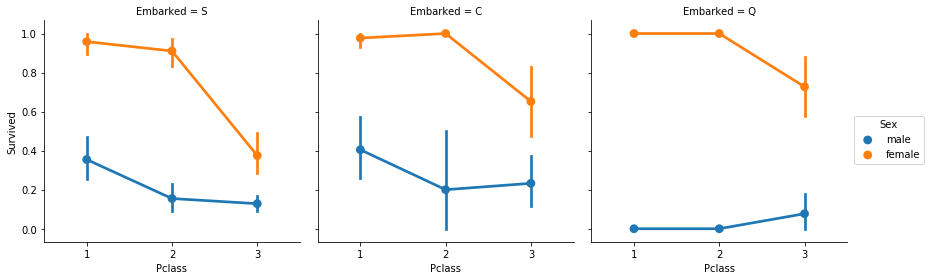

In [110]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [1]:
g = sns.FacetGrid(data, col="Embarked") 
g.map(sns.distplot, "Survived")

NameError: name 'sns' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


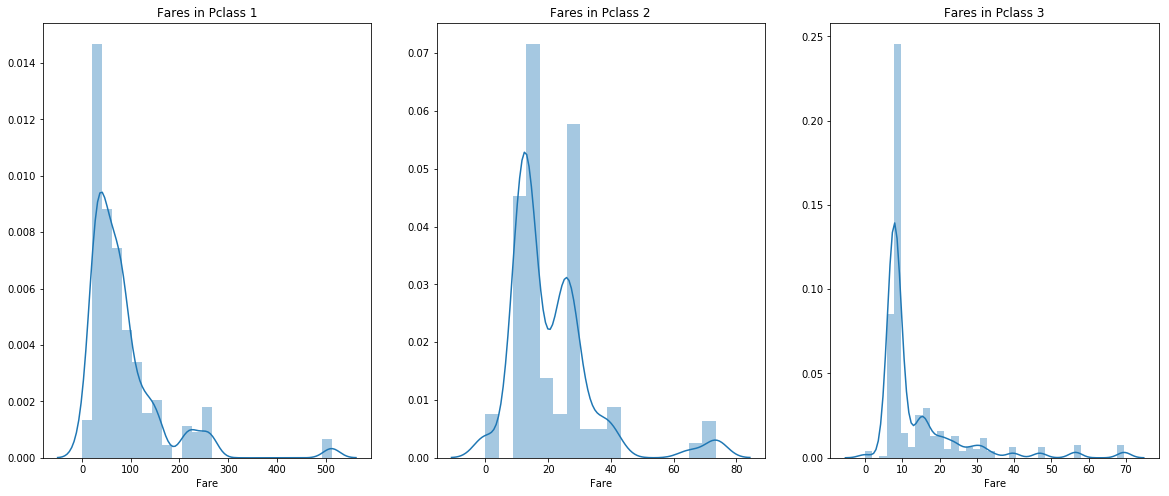

In [111]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()